# Exploratory data analysis with weather data
We are going to download data from Kaggle and find out basic information on the data set.
We will need
* pandas for manipulating data
* matplotlib.pyplot for plotting
* seaborn for plotting
* numpy for basic numerical computations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading the data set from csv file "weatherHistory.csv", downloaded from Kaggle https://www.kaggle.com/muthuj7/weather-dataset/version/1

We are going to assign a dataframe name df to the data

In [2]:
df = pd.read_csv('./weatherHistory.csv')

You can read the top part of the data set using df.head()

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


We need to see how data is stored in the dataframe, so we need to determine the types in the entries using df.types

In [4]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Next, we need to see if there are any null values using df.isnull().sum()

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Check what 'Precip Type' values are possible

In [6]:
df['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

Let's just set the missing values to 'rain'

In [9]:
df['Precip Type'].fillna('rain', inplace = True)
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

Good, nothing is missing now.  Let's just let pandas describe the data

In [10]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


This does not reveal the timestamps.  We need to format the timestamps to the right data type.

In [11]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])
print(min(df["Formatted Date"]))
print(max(df["Formatted Date"]))

2006-01-01 00:00:00+01:00
2016-12-31 23:00:00+01:00


So, the earliest record is 2006-01-01 00:00:00+01:00, and the last one is 2016-12-31 23:00:00+01:00.  Eleven years worth of daily reports.  We can plot a number of things, let's start with the histogram of temperature.

<Axes: xlabel='Temperature (C)', ylabel='Count'>

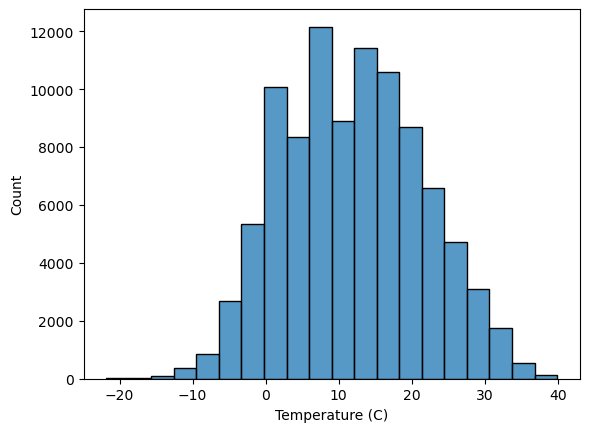

In [13]:
sns.histplot(df['Temperature (C)'], bins = 20)

Let's plot the first 100 points of temperature.

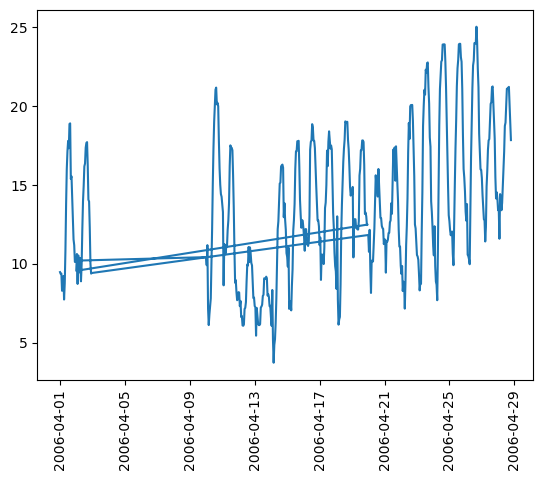

In [14]:
x = df['Formatted Date']
y = df['Temperature (C)']
plt.plot(x[0:500], y[0:500])
plt.xticks(rotation = 90)
plt.show()

Wait.  What is going on? It looks like the reports are not sorted by ascending dates, so we need to sort and replot.

In [15]:
new = df.sort_values(by = ['Formatted Date']).reset_index()

You should now see the seasonality in the data also.  We will next look at the counts of weather "Summary"

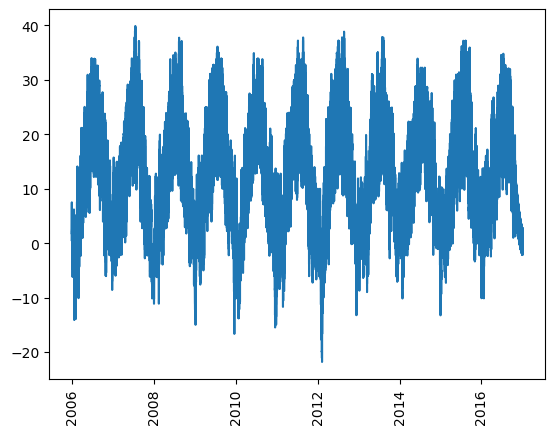

In [17]:
x = new['Formatted Date']
y = new['Temperature (C)']
plt.plot(x[0:175000], y[0:175000])
plt.xticks(rotation = 90)
plt.show()

To clean this up, and to be able to visualize, we need to do the following steps.

In [ ]:
#weather = df['Summary'].value_counts().reset_index() # produces 2-data frame with no labels
#weather.columns = ['Weather', 'Count'] # assigning labels on the 2 columns
#weather

Now we use seaborn to graph the data where the horizontal axis are "Summary" labels and vertical axis is frequency. This is called a "waterfall" graph.